In [13]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D #library for 3D-plot

## Bayesian decision theory와 Classification (분류)

#### Bayes' rule

$P( \omega_j | x ) = \frac{p(x | \omega_j) P(\omega_j)}{p(x)} = \frac{p(x | \omega_j) P(\omega_j)}{\sum_{k}{p(x|\omega_k)P(\omega_k)}}$

Bayesian decision theory는 분류(classification) 문제에 있어서 에러의 확률 $P(error) = \int{p(error, \mathbf{x}) d\mathbf{x}} = \int{p(error | \mathbf{x}) p(\mathbf{x}) d\mathbf{x}}$ 을 낮추기 위해서 어떤 선택을 해야되는지에 대한 확률적인 해법을 제시한다.

### [Exercise 1] Naive Bayes with 1D Gaussian distribution

1차원 정규 분포 함수 
- $f(x; \mu, \sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}}e^{ -\frac{(x-\mu)^2}{2 \sigma^2}} $ 

In [14]:
# probability density function for 1D gaussian distribution
def gaussian_pdf(x, mu, sigma):
    # implement here
    x_whitened = (x-mu)/sigma
    return (np.exp(-(x_whitened**2)/2))/(np.sqrt(2*np.pi)*sigma)

아래의 1차원 정규 분포를 시각화

- $x_1 \sim \mathcal{N}(\mu = 0, \sigma = 1)$

- $x_2 \sim \mathcal{N}(\mu = 4, \sigma = 1)$

아래 방정식을 만족하는 $x$는?

- $f(x; 0, 1) = f(x; 4, 1)$

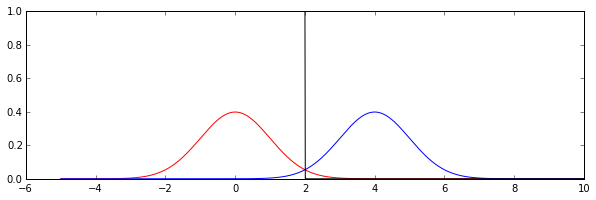

In [39]:
xMin = -5
xMax = 10
xStepSize = 0.01
xVal = np.arange(xMin,xMax,xStepSize)

mu1 = 0
sigma1 = 1

mu2 = 4
sigma2 = 1

pdf1 = gaussian_pdf(xVal, mu1, sigma1)
pdf2 = gaussian_pdf(xVal, mu2, sigma2)

plt.figure(figsize=(10,3))
plt.plot(xVal, pdf1, color='red')
plt.plot(xVal, pdf2, color='blue')
plt.plot(xVal, (pdf1 > pdf2), color='black')
plt.show()

아래의 1차원 정규 분포를 시각화

- $x_1 \sim \mathcal{N}(\mu = 0, \sigma = 1)$

- $x_2 \sim \mathcal{N}(\mu = 4, \sigma = 3)$

아래 방정식을 만족하는 $x$는?

- $f(x; 0, 1) = f(x; 4, 3)$

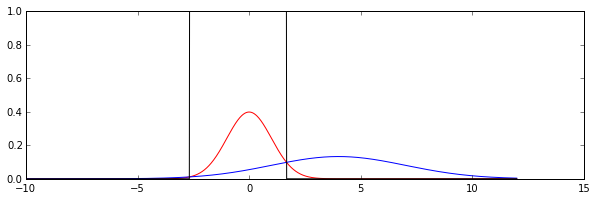

In [40]:
xMin = -10
xMax = 12
xStepSize = 0.01
xVal = np.arange(xMin,xMax,xStepSize)

mu1 = 0
sigma1 = 1

mu2 = 4
sigma2 = 3

pdf1 = gaussian_pdf(xVal, mu1, sigma1)
pdf2 = gaussian_pdf(xVal, mu2, sigma2)

plt.figure(figsize=(10,3))
plt.plot(xVal, pdf1, color='red')
plt.plot(xVal, pdf2, color='blue')
plt.plot(xVal, (pdf1 > pdf2), color='black')

plt.show()

### Multivariate Normal distribution의 covariance의 형태에 따른 decision boundary의 모양

2차원의 정규 분포 확률 밀도 함수는 다음과 같다.

$f(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \frac{1}{2\pi \sqrt{(\Sigma_{11} \Sigma_{22} - \Sigma_{12} \Sigma_{21})}}$ $exp \left( -\frac{1}{2}   \begin{bmatrix}x_1 - \mu_1 & x_2 - \mu_2 \end{bmatrix} \begin{bmatrix} \Sigma_{11} & \Sigma_{12} \\ \Sigma_{21} & \Sigma_{22} \end{bmatrix}^{-1} \begin{bmatrix}x_1 - \mu_1 \\ x_2 - \mu_2 \end{bmatrix} \right)$

In [61]:
def visualize_decision_boundary(mu1, mu2, cov1, cov2):
    # use 'plt.matshow'
    from scipy.stats import multivariate_normal

    var1 = multivariate_normal(mean=mu1, cov=cov1)
    var2 = multivariate_normal(mean=mu2, cov=cov2)

    minVal   = -10
    maxVal   = 10
    stepSize = 0.05
    xAxisVal = np.arange(minVal, maxVal, stepSize)
    yAxisVal = np.arange(minVal, maxVal, stepSize)
    xx, yy = np.meshgrid(xAxisVal, yAxisVal)

    surf = plt.matshow(var1.pdf(np.stack([xx,yy], 2))>var2.pdf(np.stack([xx,yy], 2)), cmap=cm.coolwarm)
    plt.colorbar(shrink=0.5, aspect=3)

#### (1) $\Sigma_i = \sigma^2 I$ Identity Matrix에 상수가 곱해져있는 형태

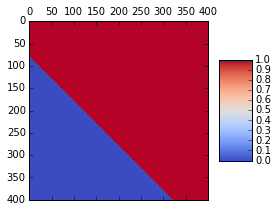

In [62]:
mu1 = np.array([0,0])
mu2 = np.array([-4,4])
sigma = 2
cov = (sigma*sigma) * np.eye(2) # Identity matrix

visualize_decision_boundary(mu1, mu2, cov, cov)

#### (2) $\Sigma_i = \Sigma$

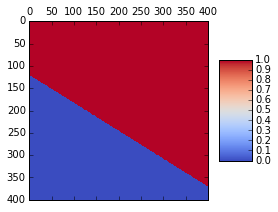

In [63]:
mu1 = np.array([0,0])
mu2 = np.array([-1,4])
cov = np.array([[2, 1], [0, 5]])

visualize_decision_boundary(mu1, mu2, cov, cov)

#### (3) $\Sigma_i = $ arbitrary (positive-semi definite matrix)

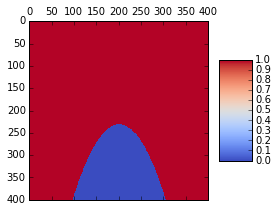

In [64]:
mu1 = np.array([0,0])
mu2 = np.array([0,4])
cov1 = np.array([[2, 1], [0, 5]])
cov2 = np.array([[1, 0], [0, 5]])

visualize_decision_boundary(mu1, mu2, cov1, cov2)